In [ ]:
### Data from MINNEAPOLIS ST. PAUL INTERNATIONAL AIRPORT, MN (1931-2024)
### https://www.ncei.noaa.gov/access/search/data-search/local-climatological-data-v2
### Coded by Jennalie Burroughs (University of Colorado)
### Last updated April 5th, 2025

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

In [2]:
#Simple way to read in the data :D! 
airport_name = "LCD_USW00014922" #name of the airport (as seen on the csv files)
years = range(1931, 2024) #all the years that you have downloaded

df_list = [pd.read_csv(f"{airport_name}_{year}.csv", low_memory=False) for year in years]
df = pd.concat(df_list, ignore_index=True)

print(df)
print(df.shape)

             STATION                 DATE  LATITUDE  LONGITUDE  ELEVATION  \
0        USW00014922  1931-01-01T00:00:00   44.8831   -93.2289      265.8   
1        USW00014922  1931-12-21T08:00:00   44.8831   -93.2289      265.8   
2        USW00014922  1931-12-21T09:00:00   44.8831   -93.2289      265.8   
3        USW00014922  1931-12-21T13:00:00   44.8831   -93.2289      265.8   
4        USW00014922  1931-12-21T15:00:00   44.8831   -93.2289      265.8   
...              ...                  ...       ...        ...        ...   
1029460  USW00014922  2023-12-31T20:53:00   44.8831   -93.2289      265.8   
1029461  USW00014922  2023-12-31T21:00:00   44.8831   -93.2289      265.8   
1029462  USW00014922  2023-12-31T21:53:00   44.8831   -93.2289      265.8   
1029463  USW00014922  2023-12-31T22:53:00   44.8831   -93.2289      265.8   
1029464  USW00014922  2023-12-31T23:53:00   44.8831   -93.2289      265.8   

                                                      NAME REPORT_TYPE  \
0

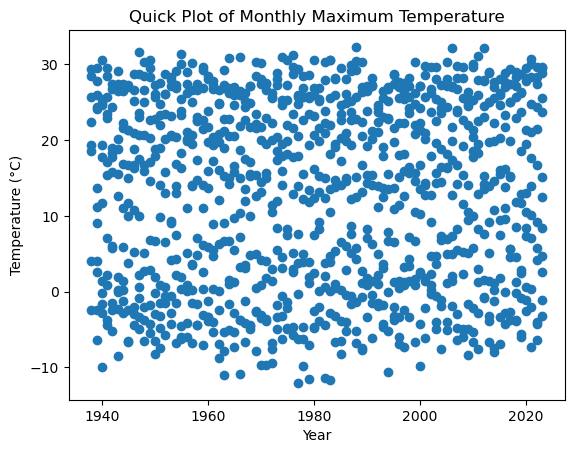

In [3]:
#Plot of Monthly Maximum Temperature to Find Missing Values or Outliers
df['Year'] = pd.to_datetime(df['DATE']).dt.year 
plt.scatter(df['Year'], df['MonthlyMaximumTemperature'])
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Quick Plot of Monthly Maximum Temperature")
plt.show()

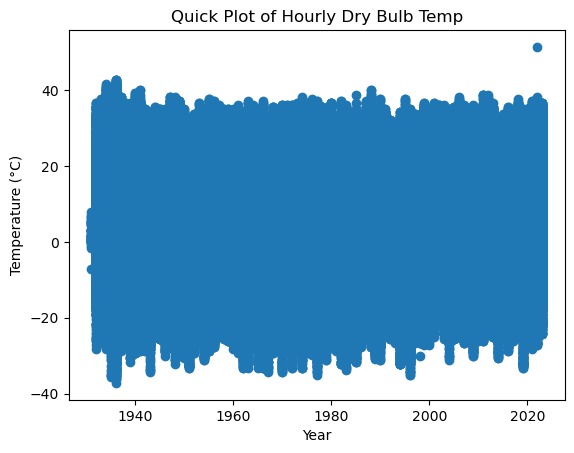

In [4]:
#Plot of Hourly Dry Bulb Temperature
df['Year'] = pd.to_datetime(df['DATE']).dt.year 
plt.scatter(df['Year'], df['HourlyDryBulbTemperature'])
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Quick Plot of Hourly Dry Bulb Temp")
plt.show()

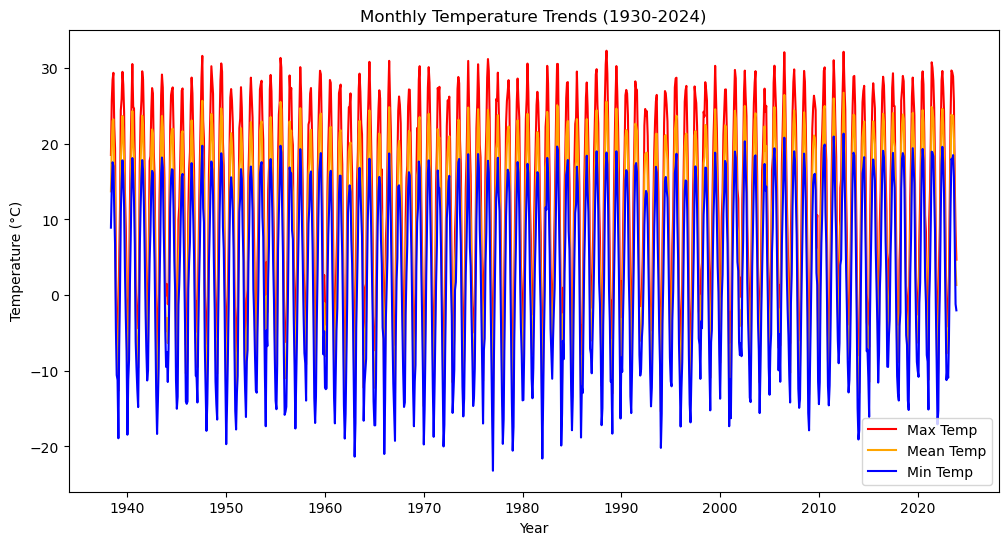

In [5]:
#ALL monthly temps included (°C)
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')

temp_data = df.groupby('YearMonth')[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

temp_data.index = temp_data.index.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Monthly Temperature Trends (1930-2024)")
plt.legend()
plt.show()

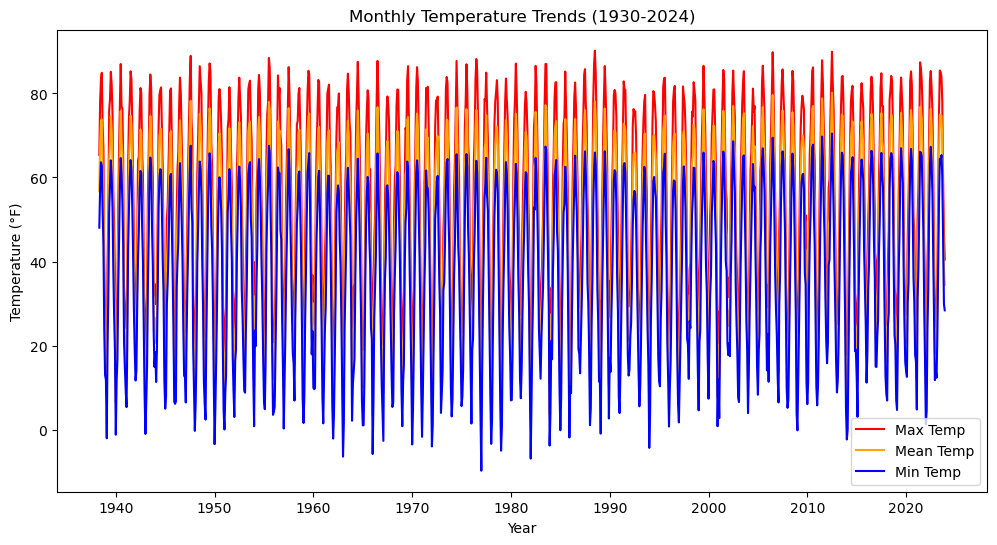

In [6]:
#ALL monthly temps included (°F)
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')

temp_data = df.groupby('YearMonth')[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

temp_data.index = temp_data.index.to_timestamp()

#Conversion from °F to °C
temp_data['MonthlyMaximumTemperature'] = temp_data['MonthlyMaximumTemperature'] * 9/5 + 32
temp_data['MonthlyMeanTemperature'] = temp_data['MonthlyMeanTemperature'] * 9/5 + 32
temp_data['MonthlyMinimumTemperature'] = temp_data['MonthlyMinimumTemperature'] * 9/5 + 32

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title("Monthly Temperature Trends (1930-2024)")
plt.legend()
plt.show()

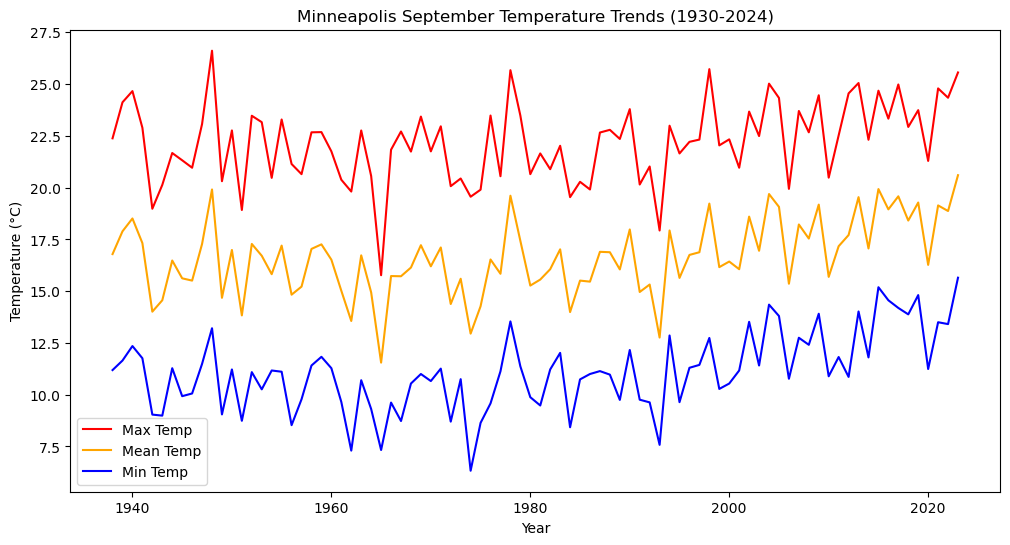

In [10]:
# Minneapolis September Temperature Trends °C
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Minneapolis September Temperature Trends (1930-2024)")
plt.legend()
plt.show()

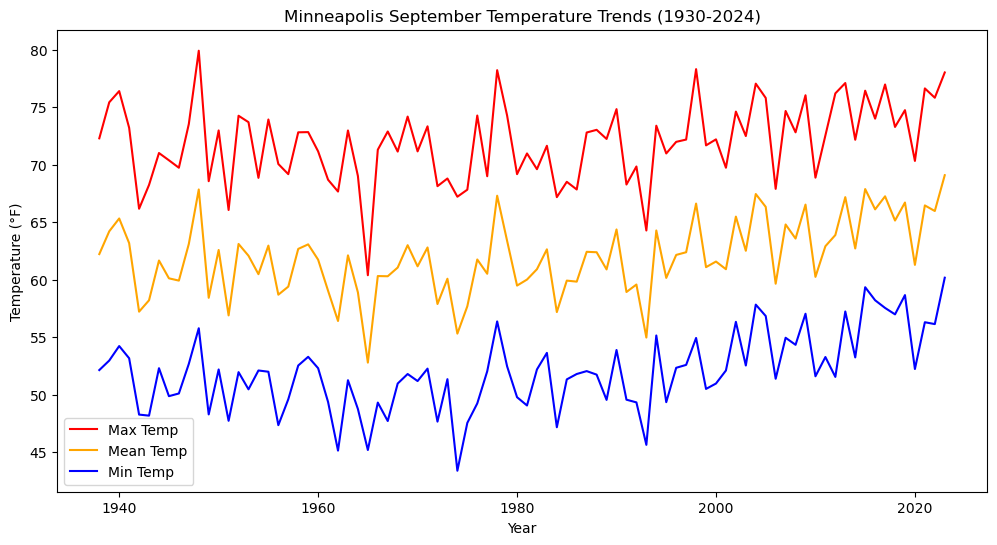

In [12]:
# Minneapolis September Temperature Trends °F
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))

#Conversion from °F to °C
temp_data['MonthlyMaximumTemperature'] = temp_data['MonthlyMaximumTemperature'] * 9/5 + 32
temp_data['MonthlyMeanTemperature'] = temp_data['MonthlyMeanTemperature'] * 9/5 + 32
temp_data['MonthlyMinimumTemperature'] = temp_data['MonthlyMinimumTemperature'] * 9/5 + 32

plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title("Minneapolis September Temperature Trends (1930-2024)")
plt.legend()
plt.show()

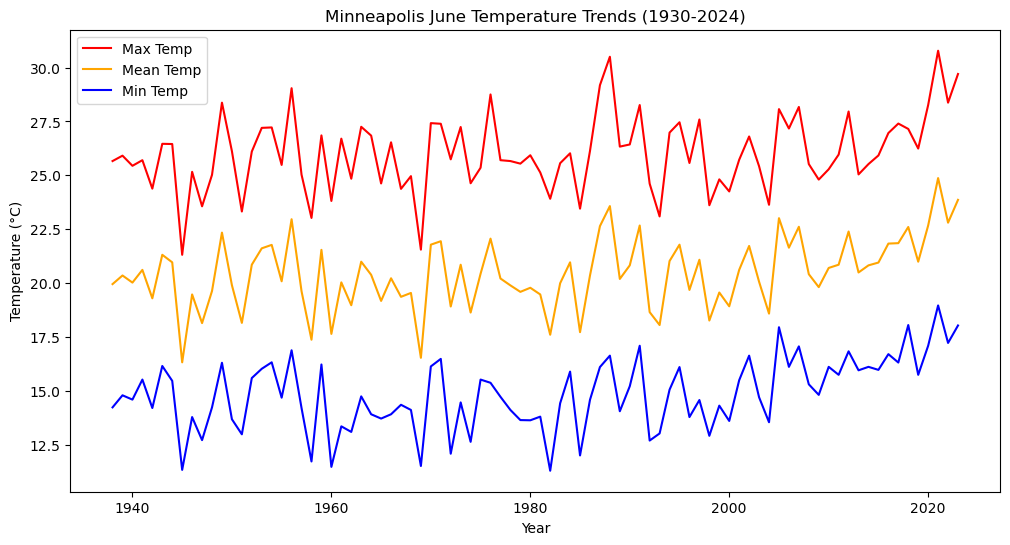

In [13]:
# Minneapolis June Temperature Trends °C
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 6] #Filtering to only do the June Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Minneapolis June Temperature Trends (1930-2024)")
plt.legend()
plt.show()

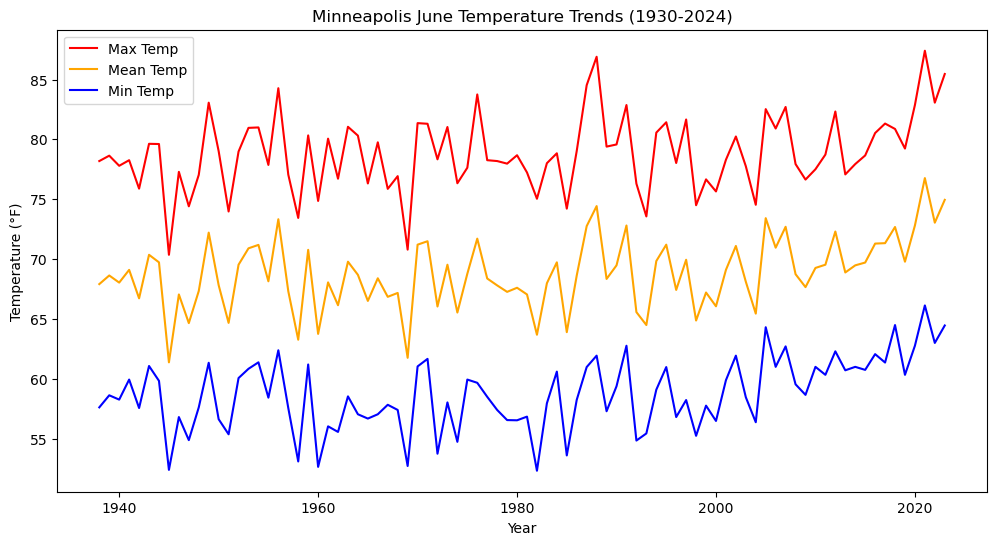

In [14]:
# Minneapolis June Temperature Trends °F
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 6] #Filtering to only do the June Temperatures :D!
temp_data = df_september.groupby(df_september['DATE'].dt.year)[['MonthlyMaximumTemperature', 'MonthlyMeanTemperature', 'MonthlyMinimumTemperature']].mean()

plt.figure(figsize=(12, 6))

#Conversion from °F to °C
temp_data['MonthlyMaximumTemperature'] = temp_data['MonthlyMaximumTemperature'] * 9/5 + 32
temp_data['MonthlyMeanTemperature'] = temp_data['MonthlyMeanTemperature'] * 9/5 + 32
temp_data['MonthlyMinimumTemperature'] = temp_data['MonthlyMinimumTemperature'] * 9/5 + 32

plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Min Temp', color='blue')

plt.xlabel("Year")
plt.ylabel("Temperature (°F)")
plt.title("Minneapolis June Temperature Trends (1930-2024)")
plt.legend()
plt.show()

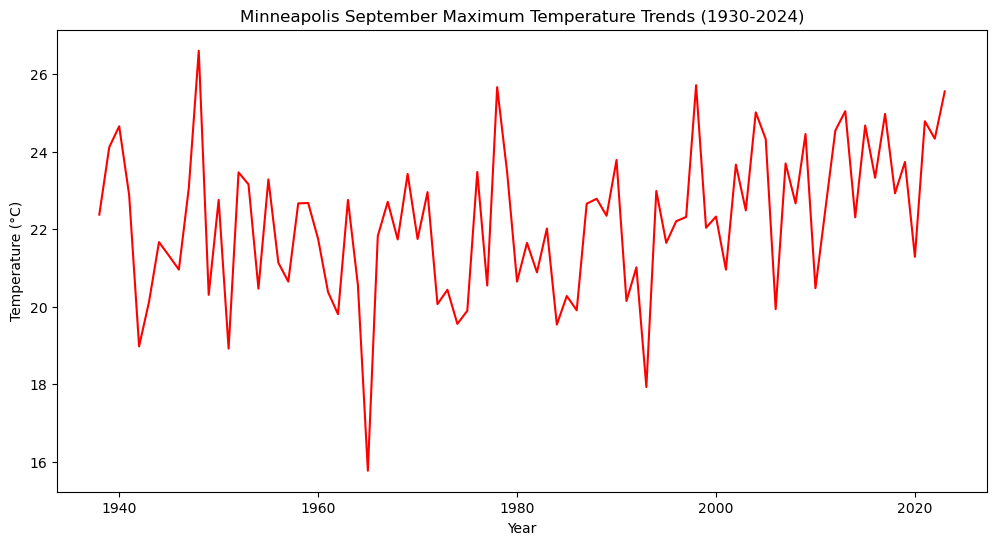

In [34]:
# Minneapolis Max September 
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMaximumTemperature'], label='Max Temp', color='red')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Minneapolis September Maximum Temperature Trends (1930-2024)")
plt.show()

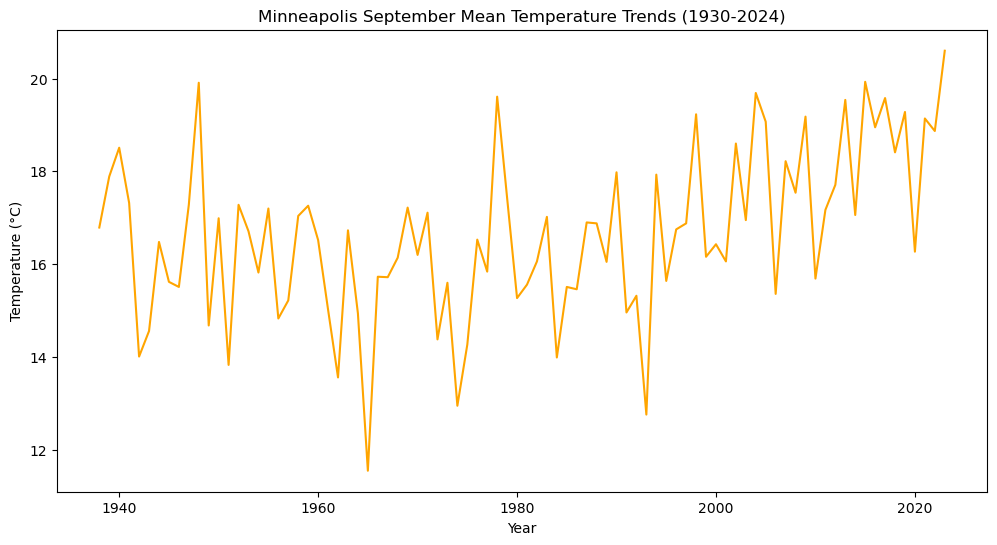

In [36]:
# Minneapolis Mean May 
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMeanTemperature'], label='Mean Temp', color='orange')

plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Minneapolis September Mean Temperature Trends (1930-2024)")
plt.show()

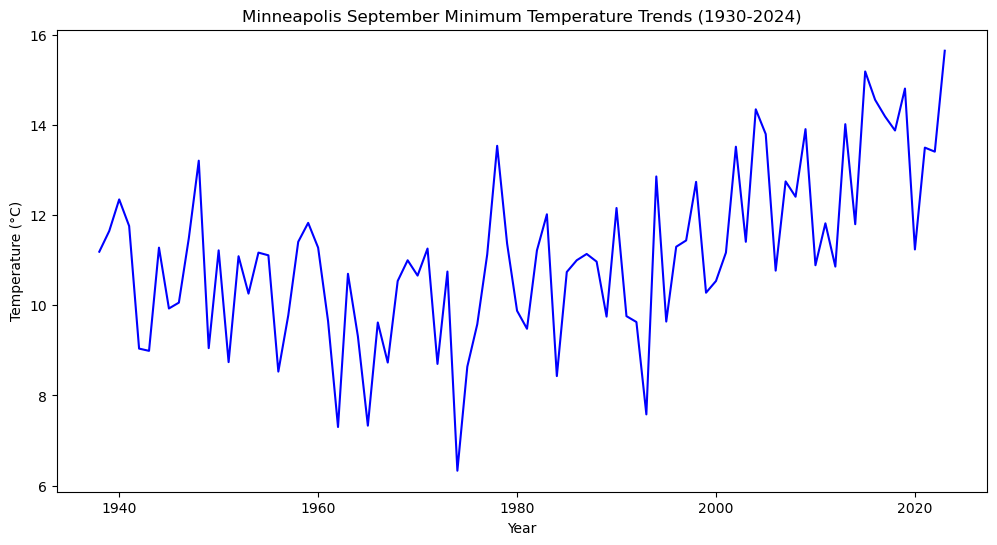

In [41]:
# Minneapolis Minimum May 
df['DATE'] = pd.to_datetime(df['DATE'])
df['YearMonth'] = df['DATE'].dt.to_period('M')
df_september = df[df['DATE'].dt.month == 9] #Filtering to only do the September Temperatures :D!
plt.figure(figsize=(12, 6))
plt.plot(temp_data.index, temp_data['MonthlyMinimumTemperature'], label='Minimum Temp', color='blue')
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.title("Minneapolis September Minimum Temperature Trends (1930-2024)")
plt.show()